1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigendecomposition:
 [ 2.86213528e+01  2.05832019e+00 -8.11944290e-16]
SVD:
 [2.86307129e+01 2.06166714e+00 7.17058526e-31]




Eigendecomposition:
 [[-0.11323894  0.56613627 -0.81649658]
 [-0.58013355 -0.70482508 -0.40824829]
 [-0.80661143  0.42744746  0.40824829]]
SVD:
 [[-0.11335822  0.5661124  -0.81649658]
 [-0.57998504 -0.70494729 -0.40824829]
 [-0.80670147  0.42727751  0.40824829]]
7.170585261696216e-31
2.3362754041285024e-32


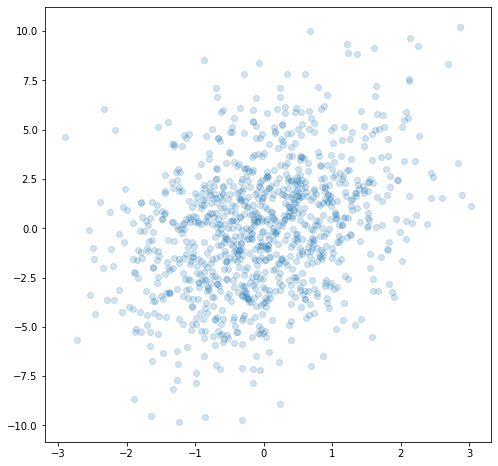

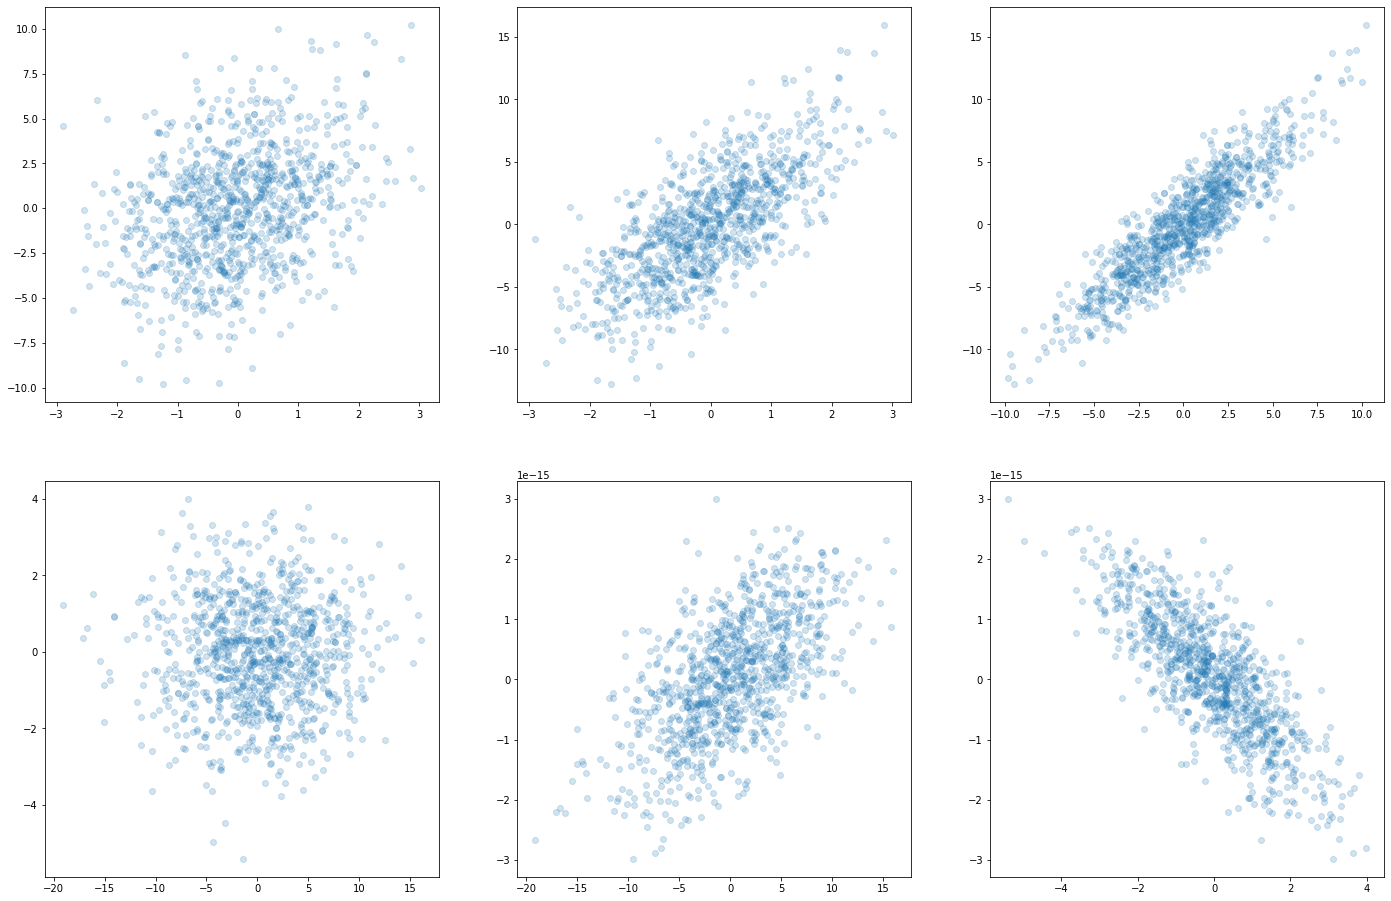

In [141]:
import numpy as np
import numpy.random as npr
from scipy import linalg as la
from matplotlib import pyplot as plt


# Setting the number of entries N for each features
N=1000

# Setting mean and std for the three features
mu1 = 0
sigma1 = 1
mu2 = 0
sigma2 = 3
mu3 = 0
sigma3 = 5

# Generating the three datasets
x1 = npr.normal(mu1,sigma1,size=N)
x2 = x1 + npr.normal(mu2,sigma2,size=N)
x3 = 2 * x1 + x2 

# Stacking together (columns) the variables in a matrix X
X = np.stack([x1,x2,x3])

#Computing covariant matrix and find eigenvalues/eigenvectors using 
#covariance matrix
np_cov = np.cov(X) 
l, V = la.eig(np_cov)
l = np.real_if_close(l)
l = -np.sort(-l)
V[:, [2, 1]] = V[:, [1, 2]]


# Compute eigenvalues/eigenvectors using SVD
U, S, Vt = np.linalg.svd(X)
# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2 / (N-1)
# The matrix U already contains the eigenvectors
V_svd = U


# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

#!!!!!! HERE THERE IS A MISMATCH BETWEEN THE TWO METHODS !!!!!

print('\n\n\n')

# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

# See the loss (%) in variability in eliminating the last eigenvector
print(l_svd[2])
print(l_svd[2].sum()/l_svd.sum())

#print(V, '\n', U)

# Retain only the first and the second components, since the loss of 
#variability is not significant: define new matrix

NX = np.delete(X, 2, 0)

# then plot the rotated dataset and its "axes"
plt.figure(figsize=(8, 8))
plt.scatter(NX[0,:], NX[1,:], alpha=0.2)

# rotate the dataset accordingly to the new base
Xp = np.dot(V_svd.T, X)

# then plot the rotated dataset and its "axes"
fig, axes = plt.subplots(2,3,figsize=(24, 16))

# Plot in the original basis
axes[0, 0].scatter(X[0,:], X[1,:], alpha=0.2)
axes[0, 1].scatter(X[0,:], X[2,:], alpha=0.2)
axes[0, 2].scatter(X[1,:], X[2,:], alpha=0.2)


# Plot in the rotated basis
axes[1, 0].scatter(Xp[0,:], Xp[1,:], alpha=0.2)
axes[1, 1].scatter(Xp[0,:], Xp[2,:], alpha=0.2)
axes[1, 2].scatter(Xp[1,:], Xp[2,:], alpha=0.2)


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 